In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/pairs_htf_htf_with_sequences_with_sequence-similarity_adjusted-headers.csv')
print(df.columns)

Index(['hTF1', 'hTF2', 'Sequence_hTF1', 'Sequence_hTF2',
       'Sequence_PercentIdentity', 'Jaccard_Similarity'],
      dtype='object')


In [19]:
jaccard_threshold = 0.3
identity_cutoffs = [30, 40, 50]
results_data = []

df_jaccard_high = df[df['Jaccard_Similarity'] >= jaccard_threshold]
df_jaccard_low = df[df['Jaccard_Similarity'] < jaccard_threshold]

total_jaccard_high = len(df_jaccard_high)
total_jaccard_low = len(df_jaccard_low)

print(f"Total pairs with Jaccard_Similarity >= {jaccard_threshold}: {total_jaccard_high}")
print(f"Total pairs with Jaccard_Similarity < {jaccard_threshold}: {total_jaccard_low}\n")


for cutoff in identity_cutoffs:
    row = {'PercentIdentity Cutoff': f'>= {cutoff}%'}

    # For Jaccard >= 0.3 group
    if total_jaccard_high > 0:
        count_high = len(df_jaccard_high[df_jaccard_high['Sequence_PercentIdentity'] >= cutoff])
        fraction_high = count_high / total_jaccard_high
        row[f'Jaccard >= {jaccard_threshold} Fraction'] = f'{fraction_high:.2%}'
    else:
        row[f'Jaccard >= {jaccard_threshold} Fraction'] = 'N/A (no pairs in group)'

    # For Jaccard < 0.3 group
    if total_jaccard_low > 0:
        count_low = len(df_jaccard_low[df_jaccard_low['Sequence_PercentIdentity'] >= cutoff])
        fraction_low = count_low / total_jaccard_low
        row[f'Jaccard < {jaccard_threshold} Fraction'] = f'{fraction_low:.2%}'
    else:
        row[f'Jaccard < {jaccard_threshold} Fraction'] = 'N/A (no pairs in group)'

    results_data.append(row)

results_df = pd.DataFrame(results_data)
print("Fraction of pairs meeting PercentIdentity cutoffs, by Jaccard_Similarity group:")
print(results_df.to_string(index=False)) 

Total pairs with Jaccard_Similarity >= 0.3: 136
Total pairs with Jaccard_Similarity < 0.3: 1142180

Fraction of pairs meeting PercentIdentity cutoffs, by Jaccard_Similarity group:
PercentIdentity Cutoff Jaccard >= 0.3 Fraction Jaccard < 0.3 Fraction
                >= 30%                  54.41%                  3.66%
                >= 40%                  27.21%                  0.71%
                >= 50%                  13.97%                  0.09%


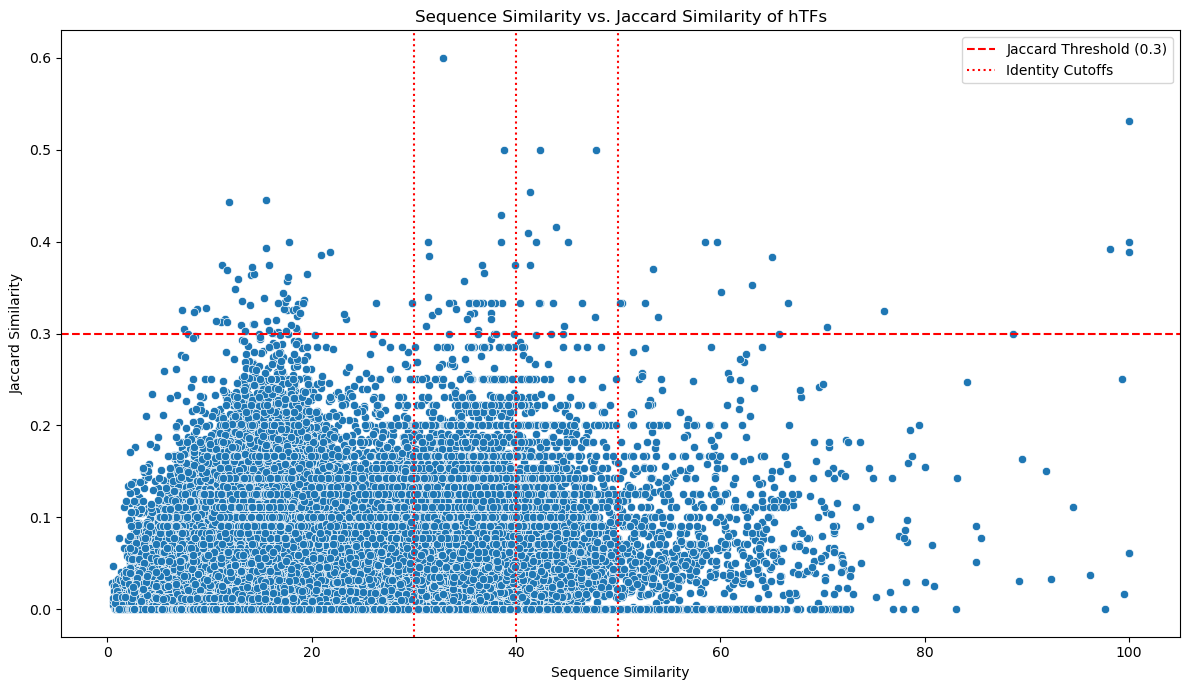

In [25]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Sequence_PercentIdentity', y='Jaccard_Similarity')
plt.axhline(y=jaccard_threshold, color='red', linestyle='--', label=f'Jaccard Threshold ({jaccard_threshold})')

# Add the vertical lines for each identity cutoff
for cutoff in identity_cutoffs:
    # add a label only to the first vertical line for a clean legend
    if cutoff == identity_cutoffs[0]:
        plt.axvline(x=cutoff, color='red', linestyle=':', label='Identity Cutoffs')
    else:
        plt.axvline(x=cutoff, color='red', linestyle=':')

plt.title('Sequence Similarity vs. Jaccard Similarity of hTFs')
plt.xlabel('Sequence Similarity')
plt.ylabel('Jaccard Similarity')
plt.legend()
plt.tight_layout() 
plt.show()

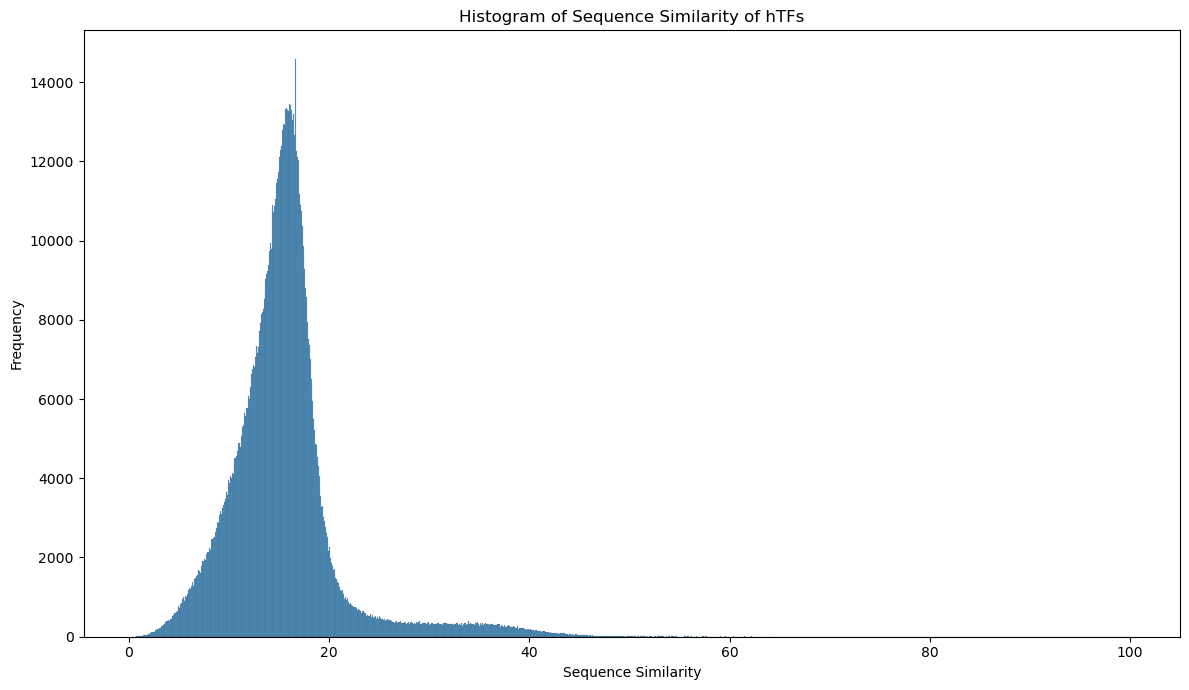

In [21]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Sequence_PercentIdentity')
plt.title('Histogram of Sequence Similarity of hTFs')
plt.xlabel('Sequence Similarity')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()

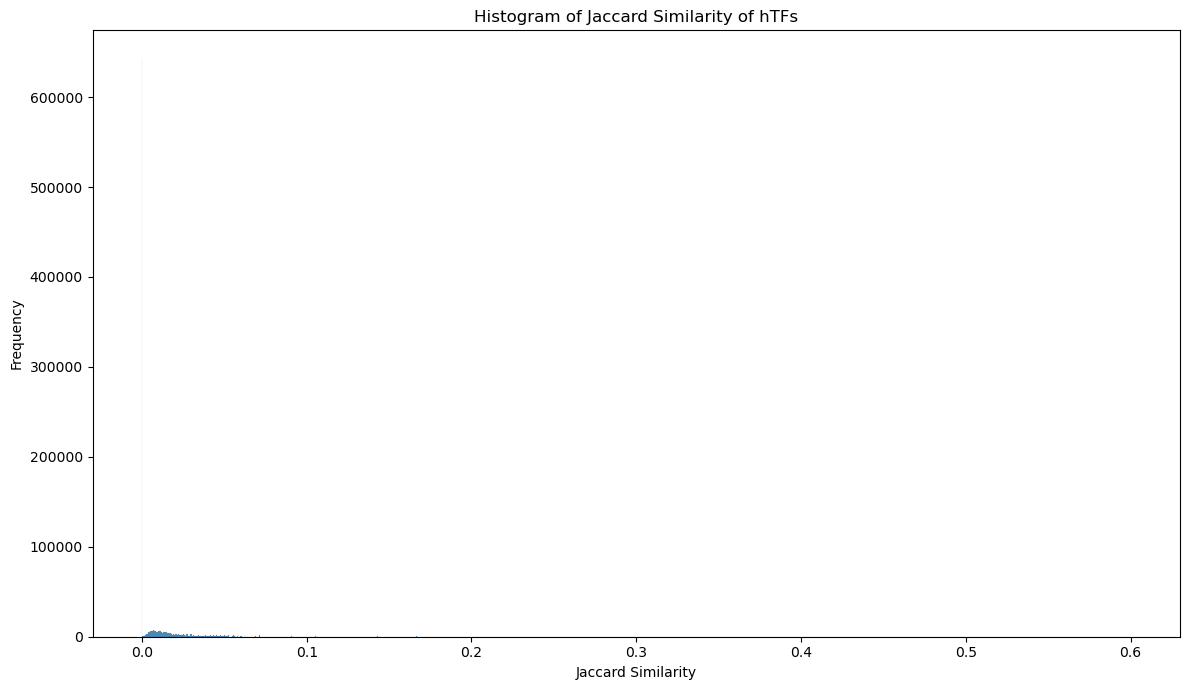

In [22]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Jaccard_Similarity')
plt.title('Histogram of Jaccard Similarity of hTFs')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()

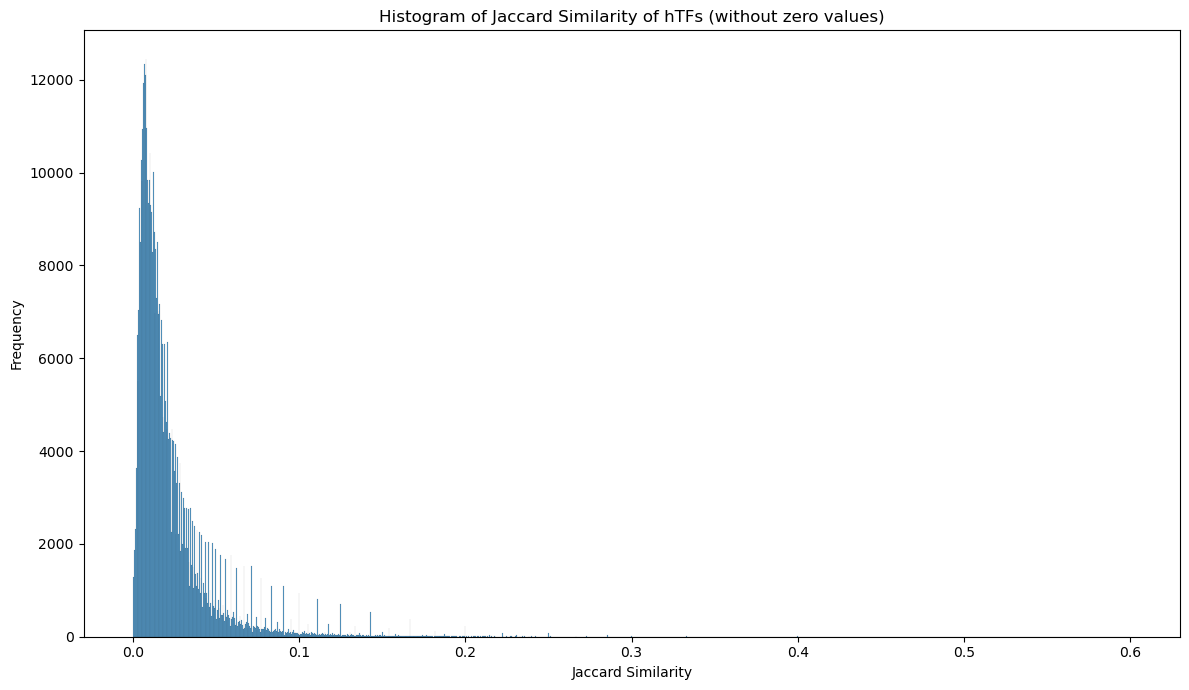

In [23]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df[df['Jaccard_Similarity']>0], x='Jaccard_Similarity')
plt.title('Histogram of Jaccard Similarity of hTFs (without zero values)')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()